<a href="https://colab.research.google.com/github/widyasitopu/football_players/blob/main/Klasifikasi_Hepatitis_C_dengan_ANN_Widya_Astuti_Sitopu_237056002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ASSIGNMENTS
Implementasi Metode Artificial Neural Network (ANN) pada Permasalahan Klasifikasi Hepatitis C

1. Download dataset Hepatitis C pada link UCI Machine Learning https://archive.ics.uci.edu/ml/datasets/HCV+data setelahnya dilakukan observasi pada dataset

In [1]:
# untuk menghubungkan google drive dengan colab karena data saya simpan di google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# lalu import library pandas dan masukkan dataset tadi ke dalam dataframe
import pandas as pd
dataset_path = ('/content/drive/MyDrive/dataset/hcvdat0.csv')
df = pd.read_csv(dataset_path)

In [3]:
# untuk melihat bagaimana kondisi data
df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


2. Setelah melakukan observasi, dari tampilan dataframe di atas, terdapat preprocessing yang harus kita lakukan. Antara lain:
- menghapus kolom yang tidak dibutuhkan seperti Unnamed
- melakukan pengecekan missing values
- melakukan one hot encoding untuk data berbentuk categorical seperti Sex yang berisi f (female) dan m (male)
- melakukan label encoding mengingat target column atau label data masih berbentuk categorical seperti 0=Blood Donor; 1=Hepatitis dan isi label lain
- melakukan standarisasi atau normalisasi melihat isi dataframe ada data yang berbentuk satuan dan juga puluhan

In [4]:
# untuk menghapus kolom unnamed karena ini tidak dibutuhkan dalam pembuatan model
df = df.drop('Unnamed: 0', axis=1)
df.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [5]:
# untuk melakukan pengecekan missing values
missing_values = df.isnull().sum()
print("Jumlah missing values per kolom:")
print(missing_values)

Jumlah missing values per kolom:
Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64


In [6]:
# karena dari hasil pengecekan terdapat missing values, maka saya isi dengan nilai median dari setiap kolom
df = df.fillna(df.median())

<ipython-input-6-a8461ffa00af>:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.median())


In [7]:
# lalu saya cek kembali apakah masih ada missing values
missing_values = df.isnull().sum()
print("Jumlah missing values per kolom:")
print(missing_values)

Jumlah missing values per kolom:
Category    0
Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
dtype: int64


In [8]:
# karena semua sudah menunjukkan nilai 0, maka saya tampilkan kembali dataframenya
df.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [9]:
# selanjutnya dilakukan one hot encoding untuk mengubah categorical di kolum sex menjadi data numeric
df = pd.get_dummies(df, columns=['Sex'], prefix='Sex', drop_first=True)

In [10]:
# tampilkan lagi dataframenya untuk melihat apakah isi kolom sex sudah menjadi numeric
df.head()

,Category,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Sex_m
0,0=Blood Donor,32,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,1
1,0=Blood Donor,32,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,1
2,0=Blood Donor,32,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,1
3,0=Blood Donor,32,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,1
4,0=Blood Donor,32,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,1


In [12]:
# selanjutnya untuk label encoding. disini saya lakukan dulu pengecekan berapa label dari target column ini
category_counts = df['Category'].value_counts()
print(category_counts)

0=Blood Donor             533
3=Cirrhosis                30
1=Hepatitis                24
2=Fibrosis                 21
0s=suspect Blood Donor      7
Name: Category, dtype: int64


In [14]:
# dapat dilihat ada lima label, maka kita lakukan label encodingnya
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Category'] = label_encoder.fit_transform(df['Category'])
X = df.drop('Category', axis=1)
y = df['Category']

In [15]:
# dan langkah preprocessing terakhir, kita lakukan standarisasi atau normalisasi data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

3. Setelah melakukan preprocessing data, selanjutnya saya membagi dataset menjadi tiga bagian yaitu data train, data validasi, dan data uji atau test. saya menggunakan perbandingan 70% : 15% : 15%

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
print("Jumlah data training:", len(X_train))
print("Jumlah data validation:", len(X_val))
print("Jumlah data testing:", len(X_test))

Jumlah data training: 430
Jumlah data validation: 92
Jumlah data testing: 93


In [17]:
# lalu saya ingin memastikan kembali bagaimana isi data sebelum masuk ke pembangunan model. maka saya menampilkan 5 teratas dari setiap pembagian data
print("Data Training:")
print(X_train[:5])
print(y_train[:5])

print("Data Validation:")
print(X_val[:5])
print(y_val[:5])

print("Data Testing:")
print(X_test[:5])
print(y_test[:5])

Data Training:
[[ 1.65143725  0.49889962  0.76396828 -0.52467073 -0.35042402  0.04595031
   0.58686301  2.07824506 -0.06613213 -0.35764156  0.41818197  0.79454373]
 [-0.33922114  1.27862839 -1.59696078  0.46238394 -0.11149185  0.08156076
   0.32368879 -1.15536115  0.00426817 -0.21848976  0.14008734  0.79454373]
 [ 0.15844346 -1.16452174 -1.1833104  -0.51680575 -0.46535342 -0.2185845
  -1.31434382  0.45698795  0.03443973 -0.57918587 -1.76949576 -1.25858397]
 [ 1.75097017 -0.43677489 -0.8750238  -0.21007163 -0.22037233 -0.25419495
  -0.54297112  0.76876817 -0.16670399 -0.22764448 -1.43578221  0.79454373]
 [ 0.75564098  1.03604611  0.14349271 -0.10389443 -0.31110607 -0.2847182
   0.47342584 -0.65651281  0.03443973 -0.19102559  0.86313337  0.79454373]]
296    0
554    2
443    0
301    0
247    0
Name: Category, dtype: int64
Data Validation:
[[-0.53828698 -0.66202987  0.40495097  0.90282268 -0.09032064 -0.06596826
   0.66400028  0.69750412  0.07466847 -0.44735785 -0.23070549  0.79454373]
 

4. Selanjutnya masuk ke perancangan dan pembangunan model ANN

In [18]:
# melakukan import library tensorflow keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [27]:
# membangun model ANN
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(12,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [28]:
# melakukan compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [29]:
# melatih model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
14/14 [==============================] - 1s 18ms/step - loss: 0.0000e+00 - accuracy: 0.7884 - val_loss: 0.0000e+00 - val_accuracy: 0.8261
Epoch 2/10
14/14 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 0.8814 - val_loss: 0.0000e+00 - val_accuracy: 0.8261
Epoch 3/10
14/14 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 0.8814 - val_loss: 0.0000e+00 - val_accuracy: 0.8261
Epoch 4/10
14/14 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 0.8837 - val_loss: 0.0000e+00 - val_accuracy: 0.8261
Epoch 5/10
14/14 [==============================] - 0s 7ms/step - loss: 0.0000e+00 - accuracy: 0.8837 - val_loss: 0.0000e+00 - val_accuracy: 0.8261
Epoch 6/10
14/14 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 0.8837 - val_loss: 0.0000e+00 - val_accuracy: 0.8261
Epoch 7/10
14/14 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 0.8837 - val_los

In [30]:
# setelah model ANN dilatih, saya melihat bagaimana akurasinya
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc}")

3/3 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 0.8280
Test Accuracy: 0.8279569745063782


5. Karena test akurasi sudah cukup baik yaitu 82.79%, saya memutuskan untuk tidak melakukan tuning parameter

6. Menampilkan grafik loss train dan validasi dari hasil pembangunan model

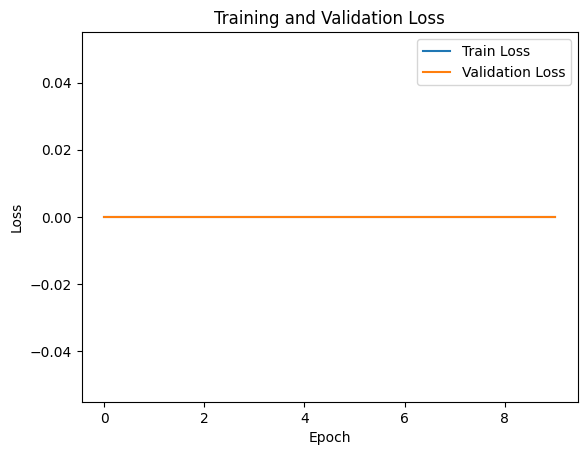

In [31]:
# untuk menampilkan training dan validation loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

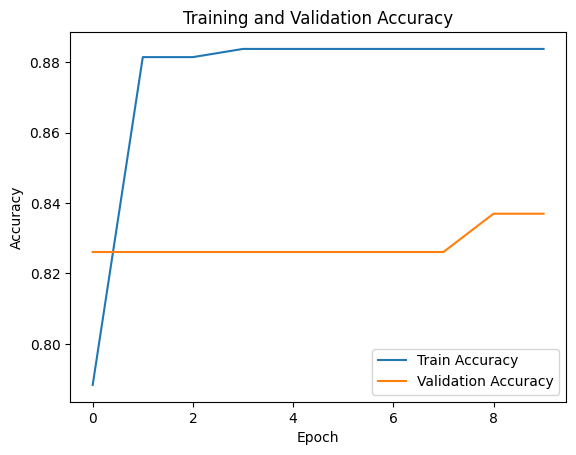

In [32]:
# untuk menampilkan training dan validasi accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

7. Selanjutnya untuk confussion matrix dan akurasi dari data uji

In [33]:
# import terlebih dahulu librarynya
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns

In [34]:
# untuk melakukan prediksi model
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype("int32")

3/3 [==============================] - 0s 4ms/step


In [35]:
# untuk menghitung confussion matrix
cm = confusion_matrix(y_test, y_pred_classes)

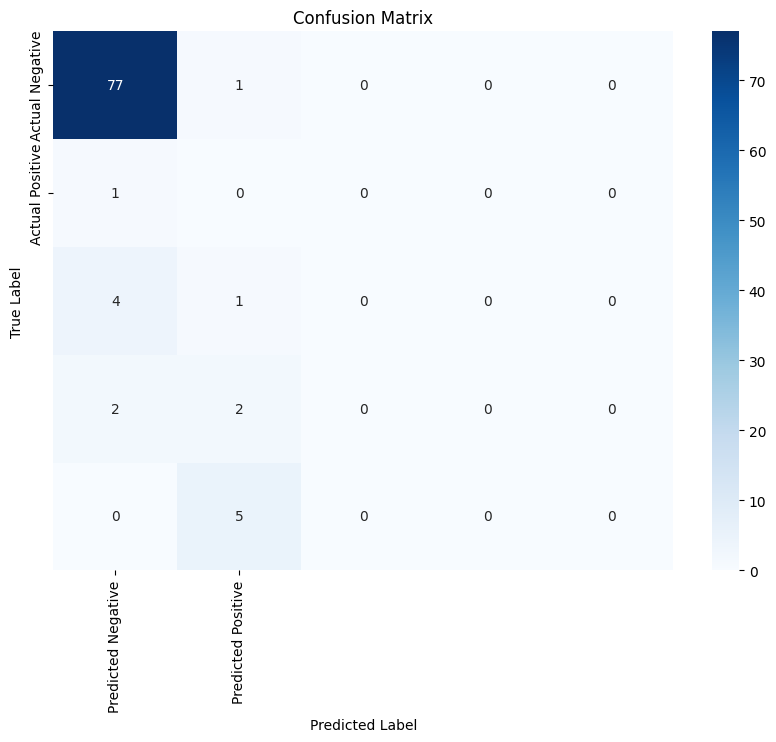

In [37]:
# untuk menampilkan visualisasi berbentuk heatmap dari confussion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [38]:
# kemudian untuk menghitung akurasi
accuracy = accuracy_score(y_test, y_pred_classes)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.83


In [39]:
# untuk menampilkan hasil classification report
print('Classification Report:')
print(classification_report(y_test, y_pred_classes))

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95        78
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         5

    accuracy                           0.83        93
   macro avg       0.18      0.20      0.19        93
weighted avg       0.77      0.83      0.80        93



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dari report di atas, kesimpulannya adalah model sudah cukup baik dengan akurasi di atas 83%. Hanya saja dapat dilihat terjadi ketidakseimbangan data mengingat data dengan label 0 jauh lebih banyak daripada data dengan label 1, 2, 3, dan 4. Karena hal ini lah model lebih mengenali data di kelas mayoritas daripada di kelas minoritas.